In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


# 读数据，整理资料集
1）我先将一些不重要的特征删掉；

2）对age特征中的缺失值进行填充，采用的方式是平均值填充；

3）我先将处理好的资料集放进了weka中，跑出了主成分分析的各个参数。（pcaw1和pcaw2分别为第一主成分和第二主成分）；

4）将没幸存的人的标签为“-1”，方便放在PLA中处理；


In [21]:
data = pd.read_csv('../input/train.csv', header=0)
data["Age"]=data["Age"].fillna(data["Age"].median())
data.loc[data["Survived"]==0,"Survived"] = -1
data = data.drop('Name',axis=1,inplace=False)
data = data.drop('SibSp',axis=1,inplace=False)
data = data.drop('Ticket',axis=1,inplace=False)
data = data.drop('Parch',axis=1,inplace=False)
data = data.drop('Cabin',axis=1,inplace=False)
data = data.drop('Embarked',axis=1,inplace=False)
data = data.drop('PassengerId',axis=1,inplace=False)
data.insert(4,'Survived',data.pop('Survived'))
data.loc[data["Sex"]== "male","Sex"] = 1
data.loc[data["Sex"]== "female","Sex"] = 2
# print(data)

# PCA降维
pcaw1 = np.array([0.668,-0.234,-0.355,-0.61])
pcaw2 = np.array([-0.09,-0.723,0.654,-0.202])


# pcaw1 = np.array([-0.09,-0.723,0.654,-0.202])
# pcaw2 = np.array([0.12,0.649,0.592,-0.462])

X1 = data.iloc[:,:4].values
# print(X1)
# X1 = data.iloc[:,:2].values
# Fare = data.iloc[:,2:4].values

X11 = np.dot(X1,pcaw1.T)
X12 = np.dot(X1,pcaw2.T)
data.insert(0,'Para2',X12)
data.insert(0,'Para1',X11)

# data.insert(0,'Para',X13)
# data = data.drop('Sex',axis=1,inplace=False)
# data = data.drop('Age',axis=1,inplace=False)
# print(data)

sv = len(data.loc[data["Survived"]==1])
nsv = len(data.loc[data["Survived"]==-1])
# print(sv)
# print(nsv)
data = data.sort_values(by="Survived" , ascending=False)
print(data)


X = data.iloc[:,:2].values

# print(len(data))
# 样本输出，维度（100，）
y = data.iloc[:,6].values
print(y)


          Para1      Para2  Pclass  Sex    Age      Fare  Survived
445  -50.919563 -14.732377       1    1   4.00   81.8583         1
319  -96.045000  -2.545000       1    2  40.00  134.5000         1
334  -91.266500 -10.221300       1    2  28.00  133.6500         1
330  -22.586500  11.899500       3    2  28.00   23.2500         1
329  -40.847312  -2.783798       1    2  16.00   57.9792         1
328  -21.989250  14.411950       3    2  31.00   20.5250         1
327  -19.842000  19.292000       2    2  36.00   13.0000         1
325  -95.316313  -5.389927       1    2  36.00  135.6333         1
689 -134.040875 -34.416175       1    2  15.00  211.3375         1
323  -24.632000   6.904000       2    2  22.00   29.0000         1
322  -17.315500  15.499300       2    2  30.00   12.3500         1
690  -45.341000   7.947000       1    1  31.00   57.0000         1
691   -8.068187  -1.810173       3    2   4.00   13.4167         1
318 -111.373687 -14.565073       1    2  31.00  164.8667      

# 数据分类及可视化处理
1） 将数据的和纵坐标进行归一化

2） 将需要分类的数据进行可视化

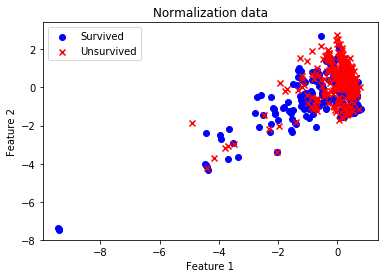

In [22]:
# 均值
u = np.mean(X, axis=0)
# 方差
v = np.std(X, axis=0)

X = (X - u) / v

# 作图
plt.scatter(X[:sv-1, 0], X[:sv-1, 1], color='blue', marker='o', label='Survived')
plt.scatter(X[sv:, 0], X[sv:, 1], color='red', marker='x', label='Unsurvived')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Normalization data')
plt.show()

In [23]:
# X加上偏置项
X = np.hstack((np.ones((X.shape[0],1)), X))
# 权重初始化
w = np.random.randn(3,1)

# 随机生成一条直线，显示初始化直线位置

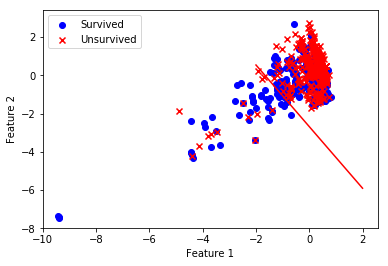

In [16]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:sv-1, 1], X[:sv-1, 2], color='blue', marker='o', label='Survived')
plt.scatter(X[sv:, 1], X[sv:, 2], color='red', marker='x', label='Unsurvived')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

# 迭代更新直线，使直线有更好的分类效果
1） 迭代次数300次，找出在循环次数中有最好分类效果的直线；

2） 数据不是线性可分，因此在分类错误点中随机选出一点，进行更新w权重值；

3） 更新依据就是如果，分类错误的点比上一次分类的个数小，则更新w，否则，保持不变；



In [17]:
for i in range(300):
    s = np.dot(X, w)
    y_pred = np.ones_like(y)
    loc_n = np.where(s < 0)[0]
    y_pred[loc_n] = -1
    num_fault = len(np.where(y != y_pred)[0])
    
    if num_fault == 0:
        break
    else:
        r = np.random.choice(num_fault)        # 随机选择一个错误分类点
        t = np.where(y != y_pred)[0][r]
        w2 = w + y[t] * X[t, :].reshape((3,1))
        
        s = np.dot(X, w2)
        y_pred = np.ones_like(y)
        loc_n = np.where(s < 0)[0]
        y_pred[loc_n] = -1
        num_fault2 = len(np.where(y != y_pred)[0])
        if num_fault2 <num_fault:
            w = w2        # 犯的错误点更少，则更新w，否则w不变
            print('第%4d次更新，分类错误的点个数：%4d' % (i, num_fault2))
        else:
            print('第%2d次更新，分类错误的点个数：%2d' % (i, num_fault))        

第 0次更新，分类错误的点个数：309
第   1次更新，分类错误的点个数： 273
第 2次更新，分类错误的点个数：273
第 3次更新，分类错误的点个数：273
第 4次更新，分类错误的点个数：273
第 5次更新，分类错误的点个数：273
第 6次更新，分类错误的点个数：273
第 7次更新，分类错误的点个数：273
第 8次更新，分类错误的点个数：273
第 9次更新，分类错误的点个数：273
第10次更新，分类错误的点个数：273
第11次更新，分类错误的点个数：273
第12次更新，分类错误的点个数：273
第13次更新，分类错误的点个数：273
第14次更新，分类错误的点个数：273
第15次更新，分类错误的点个数：273
第16次更新，分类错误的点个数：273
第17次更新，分类错误的点个数：273
第18次更新，分类错误的点个数：273
第19次更新，分类错误的点个数：273
第20次更新，分类错误的点个数：273
第21次更新，分类错误的点个数：273
第22次更新，分类错误的点个数：273
第23次更新，分类错误的点个数：273
第24次更新，分类错误的点个数：273
第25次更新，分类错误的点个数：273
第26次更新，分类错误的点个数：273
第27次更新，分类错误的点个数：273
第28次更新，分类错误的点个数：273
第29次更新，分类错误的点个数：273
第30次更新，分类错误的点个数：273
第31次更新，分类错误的点个数：273
第32次更新，分类错误的点个数：273
第33次更新，分类错误的点个数：273
第34次更新，分类错误的点个数：273
第35次更新，分类错误的点个数：273
第36次更新，分类错误的点个数：273
第37次更新，分类错误的点个数：273
第38次更新，分类错误的点个数：273
第39次更新，分类错误的点个数：273
第40次更新，分类错误的点个数：273
第41次更新，分类错误的点个数：273
第42次更新，分类错误的点个数：273
第43次更新，分类错误的点个数：273
第44次更新，分类错误的点个数：273
第45次更新，分类错误的点个数：273
第46次更新，分类错误的点个数：273
第47次更新，分类错误的点个数：273
第48次更新，分类错误的点个数：273
第49次更新，分类错误的点个数：2

# 画出更新后的直线效果

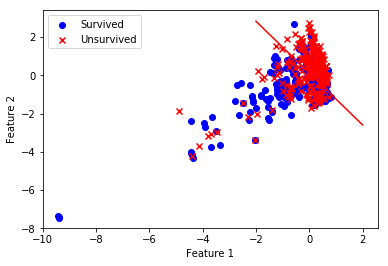

In [18]:
# 直线第一个坐标（x1，y1）
x1 = -2
y1 = -1 / w[2] * (w[0] * 1 + w[1] * x1)
# 直线第二个坐标（x2，y2）
x2 = 2
y2 = -1 / w[2] * (w[0] * 1 + w[1] * x2)
# 作图
plt.scatter(X[:sv-1, 1], X[:sv-1, 2], color='blue', marker='o', label='Survived')
plt.scatter(X[sv:, 1], X[sv:, 2], color='red', marker='x', label='Unsurvived')
plt.plot([x1,x2], [y1,y2],'r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

# 计算分类titanic中训练资料集的正确率

In [19]:
s = np.dot(X, w)
y_pred = np.ones_like(y)
loc_n = np.where(s < 0)[0]
y_pred[loc_n] = -1
accuracy = len(np.where(y == y_pred)[0]) / len(y)
print('accuracy: %.2f' % accuracy)

accuracy: 0.69
